In [172]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Preparing The Data

In [173]:
import os
#dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
directory = "C:/Users/Supra/Documents/Supravat/Documents/ISB/Capstone Project/Images"
filepath = []
for file in  os.listdir(directory):
 
   filepath.append(os.path.join(directory, file))
print(filepath)



['C:/Users/Supra/Documents/Supravat/Documents/ISB/Capstone Project/Images\\10', 'C:/Users/Supra/Documents/Supravat/Documents/ISB/Capstone Project/Images\\100', 'C:/Users/Supra/Documents/Supravat/Documents/ISB/Capstone Project/Images\\1000', 'C:/Users/Supra/Documents/Supravat/Documents/ISB/Capstone Project/Images\\1001', 'C:/Users/Supra/Documents/Supravat/Documents/ISB/Capstone Project/Images\\1002', 'C:/Users/Supra/Documents/Supravat/Documents/ISB/Capstone Project/Images\\1003', 'C:/Users/Supra/Documents/Supravat/Documents/ISB/Capstone Project/Images\\1004', 'C:/Users/Supra/Documents/Supravat/Documents/ISB/Capstone Project/Images\\1005', 'C:/Users/Supra/Documents/Supravat/Documents/ISB/Capstone Project/Images\\1006', 'C:/Users/Supra/Documents/Supravat/Documents/ISB/Capstone Project/Images\\1007', 'C:/Users/Supra/Documents/Supravat/Documents/ISB/Capstone Project/Images\\1008', 'C:/Users/Supra/Documents/Supravat/Documents/ISB/Capstone Project/Images\\1009', 'C:/Users/Supra/Documents/Supr

C:/Users/Supra/Documents/Supravat/Documents/ISB/Capstone Project/Images\SupRay
['C:/Users/Supra/Documents/Supravat/Documents/ISB/Capstone Project/Images\\SupRay\\S1 (1).jpg', 'C:/Users/Supra/Documents/Supravat/Documents/ISB/Capstone Project/Images\\SupRay\\S1 (2).jpg', 'C:/Users/Supra/Documents/Supravat/Documents/ISB/Capstone Project/Images\\SupRay\\S1 (3).jpg', 'C:/Users/Supra/Documents/Supravat/Documents/ISB/Capstone Project/Images\\SupRay\\S1 (4).jpg', 'C:/Users/Supra/Documents/Supravat/Documents/ISB/Capstone Project/Images\\SupRay\\S1 (5).jpg']
C:/Users/Supra/Documents/Supravat/Documents/ISB/Capstone Project/Images\SupRay\S1 (1).jpg


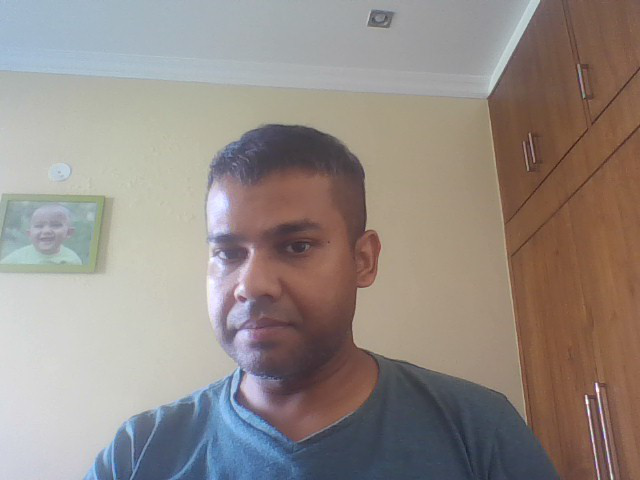

In [174]:
supray = os.path.join(directory,'SupRay')
print(supray)
supimage = []
for file in os.listdir(supray) :
    supimage.append(os.path.join(supray,file))
    
print(supimage)
    

print(supimage[0])
PIL.Image.open(str(supimage[0]))



In [175]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_height,img_width=180,180
batch_size=16
import os
directory =os.path.normpath(directory)
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=45,
      width_shift_range=0.3,
      height_shift_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')


train_ds1 = train_datagen.flow_from_directory(
        directory,
        shuffle = True ,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical')


train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  directory,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
print(directory)



Found 8286 images belonging to 1695 classes.
Found 8286 files belonging to 1695 classes.
Using 6629 files for training.
C:\Users\Supra\Documents\Supravat\Documents\ISB\Capstone Project\Images


In [176]:
import numpy as np

len(np.concatenate([i for x, i in train_ds], axis=0))

6629

In [177]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  directory,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 8286 files belonging to 1695 classes.
Using 1657 files for validation.


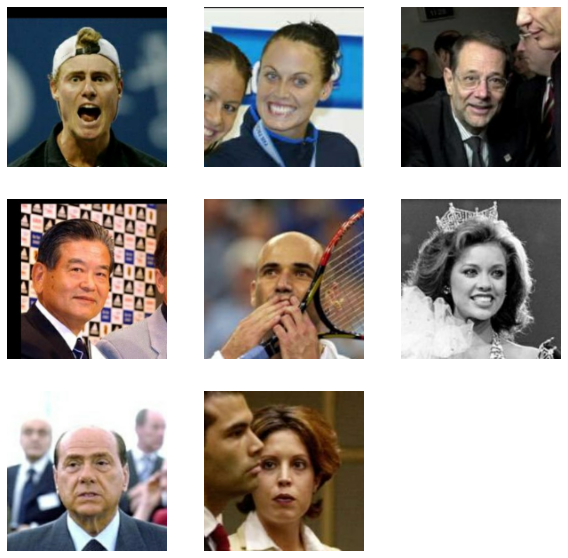

In [178]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(8):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    
    plt.axis("off")

In [179]:
class_names = train_ds.class_names
print(class_names)

['10', '100', '1000', '1001', '1002', '1003', '1004', '1005', '1006', '1007', '1008', '1009', '101', '1010', '1011', '1012', '1013', '1014', '1015', '1016', '1017', '1018', '1019', '102', '1020', '1021', '1022', '1023', '1024', '1025', '1026', '1027', '1028', '1029', '103', '1030', '1031', '1032', '1033', '1034', '1035', '1036', '1037', '1038', '1039', '104', '1040', '1041', '1042', '1043', '1044', '1045', '1046', '1047', '1048', '1049', '105', '1050', '1051', '1052', '1053', '1054', '1055', '1056', '1057', '1058', '1059', '106', '1060', '1061', '1062', '1063', '1064', '1065', '1066', '1067', '1068', '1069', '107', '1070', '1071', '1072', '1073', '1074', '1075', '1076', '1077', '1078', '1079', '108', '1080', '1081', '1082', '1083', '1084', '1085', '1086', '1087', '1088', '1089', '109', '1090', '1091', '1092', '1093', '1094', '1095', '1096', '1097', '1098', '1099', '11', '110', '1100', '1101', '1102', '1103', '1104', '1105', '1106', '1107', '1108', '1109', '111', '1110', '1111', '1112',

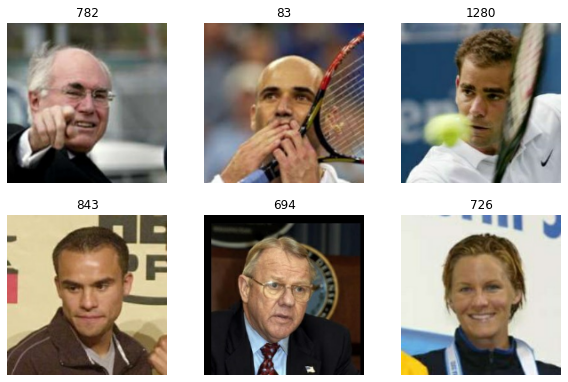

In [180]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(2):
  
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# Training The Model


In [185]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=1695,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(1695, activation='softmax'))

In [186]:
resnet_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten_10 (Flatten)         (None, 2048)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 512)               1049088   
_________________________________________________________________
dense_27 (Dense)             (None, 1695)              869535    
Total params: 25,506,335
Trainable params: 1,918,623
Non-trainable params: 23,587,712
_________________________________________________________________


In [187]:
resnet_model.compile(optimizer=Adam(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
epochs=15
history = resnet_model.fit(
  train_ds,
  #steps_per_epoch=totalTrain // config.BS
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15


180/415 [============>.................] - ETA: 0s - loss: 7.7783 - accuracy: 0.0000e+ - ETA: 6:47 - loss: 7.6477 - accuracy: 0.0000e+ - ETA: 9:16 - loss: 7.6568 - accuracy: 0.0000e+ - ETA: 10:21 - loss: 7.6805 - accuracy: 0.0000e+0 - ETA: 10:56 - loss: 7.7724 - accuracy: 0.0000e+0 - ETA: 11:11 - loss: 7.7739 - accuracy: 0.0000e+0 - ETA: 11:28 - loss: 7.7351 - accuracy: 0.0089    - ETA: 12:08 - loss: 7.7482 - accuracy: 0.007 - ETA: 12:30 - loss: 7.7863 - accuracy: 0.006 - ETA: 13:04 - loss: 7.8118 - accuracy: 0.006 - ETA: 14:05 - loss: 7.8150 - accuracy: 0.005 - ETA: 14:31 - loss: 7.7631 - accuracy: 0.005 - ETA: 14:33 - loss: 7.7676 - accuracy: 0.004 - ETA: 15:03 - loss: 7.7581 - accuracy: 0.004 - ETA: 15:09 - loss: 7.7681 - accuracy: 0.004 - ETA: 15:15 - loss: 7.7322 - accuracy: 0.003 - ETA: 15:22 - loss: 7.7464 - accuracy: 0.003 - ETA: 15:30 - loss: 7.7203 - accuracy: 0.003 - ETA: 15:22 - loss: 7.6989 - accuracy: 0.003 - ETA: 15:27 - loss: 7.6350 - accuracy: 0.006 - ETA: 15:21 - loss

366/415 [=========================>....] - ETA: 7:10 - loss: 7.2566 - accuracy: 0.01 - ETA: 7:06 - loss: 7.2563 - accuracy: 0.01 - ETA: 7:03 - loss: 7.2524 - accuracy: 0.01 - ETA: 7:00 - loss: 7.2535 - accuracy: 0.01 - ETA: 6:56 - loss: 7.2538 - accuracy: 0.01 - ETA: 6:53 - loss: 7.2515 - accuracy: 0.01 - ETA: 6:51 - loss: 7.2504 - accuracy: 0.01 - ETA: 6:48 - loss: 7.2491 - accuracy: 0.01 - ETA: 6:46 - loss: 7.2484 - accuracy: 0.01 - ETA: 6:44 - loss: 7.2472 - accuracy: 0.01 - ETA: 6:42 - loss: 7.2437 - accuracy: 0.01 - ETA: 6:41 - loss: 7.2433 - accuracy: 0.01 - ETA: 6:40 - loss: 7.2427 - accuracy: 0.01 - ETA: 6:38 - loss: 7.2408 - accuracy: 0.01 - ETA: 6:37 - loss: 7.2422 - accuracy: 0.01 - ETA: 6:36 - loss: 7.2388 - accuracy: 0.01 - ETA: 6:35 - loss: 7.2419 - accuracy: 0.01 - ETA: 6:33 - loss: 7.2408 - accuracy: 0.01 - ETA: 6:32 - loss: 7.2413 - accuracy: 0.01 - ETA: 6:31 - loss: 7.2413 - accuracy: 0.01 - ETA: 6:29 - loss: 7.2392 - accuracy: 0.01 - ETA: 6:28 - loss: 7.2383 - accura

415/415 [==============================] - ETA: 1:26 - loss: 7.1225 - accuracy: 0.01 - ETA: 1:24 - loss: 7.1216 - accuracy: 0.01 - ETA: 1:22 - loss: 7.1209 - accuracy: 0.01 - ETA: 1:20 - loss: 7.1185 - accuracy: 0.01 - ETA: 1:19 - loss: 7.1175 - accuracy: 0.01 - ETA: 1:17 - loss: 7.1175 - accuracy: 0.01 - ETA: 1:15 - loss: 7.1183 - accuracy: 0.01 - ETA: 1:13 - loss: 7.1186 - accuracy: 0.01 - ETA: 1:12 - loss: 7.1173 - accuracy: 0.01 - ETA: 1:10 - loss: 7.1166 - accuracy: 0.01 - ETA: 1:08 - loss: 7.1165 - accuracy: 0.01 - ETA: 1:06 - loss: 7.1151 - accuracy: 0.01 - ETA: 1:04 - loss: 7.1147 - accuracy: 0.01 - ETA: 1:03 - loss: 7.1152 - accuracy: 0.01 - ETA: 1:01 - loss: 7.1142 - accuracy: 0.01 - ETA: 59s - loss: 7.1136 - accuracy: 0.0136 - ETA: 57s - loss: 7.1117 - accuracy: 0.013 - ETA: 55s - loss: 7.1122 - accuracy: 0.013 - ETA: 53s - loss: 7.1115 - accuracy: 0.013 - ETA: 51s - loss: 7.1113 - accuracy: 0.013 - ETA: 50s - loss: 7.1106 - accuracy: 0.013 - ETA: 48s - loss: 7.1096 - accura

185/415 [============>.................] - ETA: 0s - loss: 6.3289 - accuracy: 0.0000e+ - ETA: 3:51 - loss: 6.4223 - accuracy: 0.0000e+ - ETA: 5:55 - loss: 6.4326 - accuracy: 0.0000e+ - ETA: 7:19 - loss: 6.2784 - accuracy: 0.0000e+ - ETA: 7:52 - loss: 6.3254 - accuracy: 0.0000e+ - ETA: 7:48 - loss: 6.2741 - accuracy: 0.0000e+ - ETA: 7:35 - loss: 6.3168 - accuracy: 0.0000e+ - ETA: 7:18 - loss: 6.3104 - accuracy: 0.0000e+ - ETA: 7:02 - loss: 6.3404 - accuracy: 0.0000e+ - ETA: 6:49 - loss: 6.2376 - accuracy: 0.0000e+ - ETA: 6:35 - loss: 6.1972 - accuracy: 0.0114   - ETA: 6:22 - loss: 6.2076 - accuracy: 0.01 - ETA: 6:10 - loss: 6.1759 - accuracy: 0.01 - ETA: 6:05 - loss: 6.1749 - accuracy: 0.01 - ETA: 5:58 - loss: 6.1514 - accuracy: 0.01 - ETA: 5:55 - loss: 6.1425 - accuracy: 0.01 - ETA: 5:53 - loss: 6.1118 - accuracy: 0.01 - ETA: 5:50 - loss: 6.0997 - accuracy: 0.02 - ETA: 5:47 - loss: 6.0999 - accuracy: 0.01 - ETA: 5:43 - loss: 6.0557 - accuracy: 0.02 - ETA: 5:39 - loss: 6.0705 - accuracy

371/415 [=========================>....] - ETA: 5:09 - loss: 6.2149 - accuracy: 0.01 - ETA: 5:07 - loss: 6.2131 - accuracy: 0.01 - ETA: 5:04 - loss: 6.2131 - accuracy: 0.01 - ETA: 5:02 - loss: 6.2135 - accuracy: 0.01 - ETA: 5:00 - loss: 6.2110 - accuracy: 0.01 - ETA: 4:59 - loss: 6.2126 - accuracy: 0.01 - ETA: 4:58 - loss: 6.2113 - accuracy: 0.01 - ETA: 4:57 - loss: 6.2121 - accuracy: 0.01 - ETA: 4:56 - loss: 6.2129 - accuracy: 0.01 - ETA: 4:55 - loss: 6.2121 - accuracy: 0.01 - ETA: 4:55 - loss: 6.2118 - accuracy: 0.01 - ETA: 4:54 - loss: 6.2113 - accuracy: 0.01 - ETA: 4:53 - loss: 6.2122 - accuracy: 0.01 - ETA: 4:52 - loss: 6.2110 - accuracy: 0.01 - ETA: 4:51 - loss: 6.2106 - accuracy: 0.01 - ETA: 4:50 - loss: 6.2111 - accuracy: 0.01 - ETA: 4:49 - loss: 6.2105 - accuracy: 0.01 - ETA: 4:49 - loss: 6.2135 - accuracy: 0.01 - ETA: 4:48 - loss: 6.2134 - accuracy: 0.01 - ETA: 4:47 - loss: 6.2142 - accuracy: 0.01 - ETA: 4:46 - loss: 6.2144 - accuracy: 0.01 - ETA: 4:45 - loss: 6.2166 - accura

415/415 [==============================] - ETA: 1:08 - loss: 6.2845 - accuracy: 0.02 - ETA: 1:06 - loss: 6.2847 - accuracy: 0.02 - ETA: 1:04 - loss: 6.2836 - accuracy: 0.02 - ETA: 1:03 - loss: 6.2836 - accuracy: 0.02 - ETA: 1:01 - loss: 6.2846 - accuracy: 0.02 - ETA: 59s - loss: 6.2839 - accuracy: 0.0207 - ETA: 58s - loss: 6.2826 - accuracy: 0.020 - ETA: 56s - loss: 6.2833 - accuracy: 0.020 - ETA: 55s - loss: 6.2842 - accuracy: 0.020 - ETA: 53s - loss: 6.2842 - accuracy: 0.020 - ETA: 52s - loss: 6.2839 - accuracy: 0.020 - ETA: 50s - loss: 6.2830 - accuracy: 0.020 - ETA: 49s - loss: 6.2815 - accuracy: 0.021 - ETA: 47s - loss: 6.2798 - accuracy: 0.020 - ETA: 46s - loss: 6.2802 - accuracy: 0.020 - ETA: 44s - loss: 6.2799 - accuracy: 0.020 - ETA: 43s - loss: 6.2799 - accuracy: 0.020 - ETA: 41s - loss: 6.2786 - accuracy: 0.020 - ETA: 39s - loss: 6.2793 - accuracy: 0.020 - ETA: 38s - loss: 6.2813 - accuracy: 0.020 - ETA: 36s - loss: 6.2807 - accuracy: 0.020 - ETA: 35s - loss: 6.2817 - accura

# Evaluating The Model

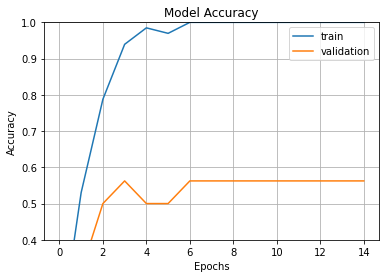

In [140]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

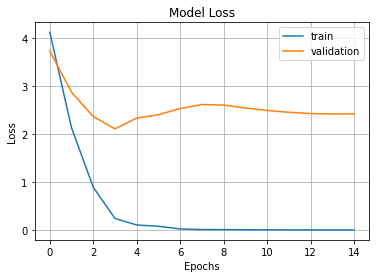

In [141]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

# Making Predictions

[[[184 160 130]
  [185 161 131]
  [185 161 131]
  ...
  [ 69  73  92]
  [ 68  72  91]
  [ 70  70  90]]

 [[186 161 131]
  [186 161 131]
  [185 160 130]
  ...
  [ 69  73  92]
  [ 68  72  91]
  [ 69  70  90]]

 [[187 161 131]
  [187 161 131]
  [187 161 131]
  ...
  [ 67  73  92]
  [ 71  75  94]
  [ 72  72  93]]

 ...

 [[204 182 170]
  [205 183 171]
  [204 182 170]
  ...
  [ 70  75 100]
  [ 67  76 105]
  [ 68  80 108]]

 [[206 184 173]
  [204 182 171]
  [205 183 172]
  ...
  [ 72  76 101]
  [ 67  76 103]
  [ 68  78 106]]

 [[203 181 170]
  [205 183 172]
  [203 181 170]
  ...
  [ 68  73  96]
  [ 70  77 104]
  [ 68  74 103]]]
(1, 180, 180, 3)


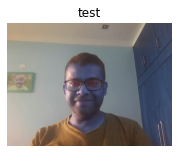

In [144]:
import cv2
image=cv2.imread(str(supimage[1]))
plt.figure(figsize=(10, 10))

ax = plt.subplot(3, 3, i + 1)
plt.imshow(image)
plt.title('test')
plt.axis("off")
image_resized= cv2.resize(image, (img_height,img_width))
print(image_resized)
image=np.expand_dims(image_resized,axis=0)

print(image.shape)


In [145]:
pred=resnet_model.predict(image)
print(pred)

[[1.3393924e-03 5.1719449e-03 4.4175446e-05 4.5668225e-05 3.4318571e-05
  5.0090980e-06 2.5747563e-03 1.0172234e-04 1.1734013e-06 3.7349091e-06
  1.7671720e-05 1.3862705e-05 1.6170747e-04 9.9045324e-01 7.9730808e-06
  2.3420962e-05 9.4398395e-08 1.2510527e-07]]


In [146]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is SupRay


In [147]:
import cv2
from mtcnn.mtcnn import MTCNN
from deepface import DeepFace


#capture the video from webcam
webcam_video_stream = cv2.VideoCapture(0)

#create an instance of MTCNN detector
mtcnn_detector = MTCNN()

#initialize the array variable to hold all face locations in the frame
all_face_locations = []

#loop through every frame in the video
while True:
    #get the current frame from the video stream as an image
    ret,current_frame = webcam_video_stream.read()
    test = current_frame
    #resize the current frame to 1/4 size to proces faster
    current_frame_small = cv2.resize(current_frame,(0,0),fx=0.25,fy=0.25)
    #detect all face locations using the mtcnn dectector
    all_face_locations = mtcnn_detector.detect_faces(current_frame_small)
    #looping through the face locations
    for index,current_face_location in enumerate(all_face_locations):
        #splitting the tuple to get the four position values of current face
        x,y,width,height = current_face_location['box']
        left_pos = x
        top_pos = y
        right_pos = x+width
        bottom_pos = y+height
        #change the position maginitude to fit the actual size video frame
        top_pos = top_pos*4
        right_pos = right_pos*4
        bottom_pos = bottom_pos*4
        left_pos = left_pos*4
        #printing the location of current face
        #print('Found face {} at top:{},right:{},bottom:{},left:{}'.format(index+1,top_pos,right_pos,bottom_pos,left_pos))
        #draw rectangle around the face detected
        cv2.rectangle(current_frame,(left_pos,top_pos),(right_pos,bottom_pos),(0,0,255),2)
        #draw circles for every face keypoints
        keypoints = current_face_location['keypoints']
        x,y =  keypoints['left_eye']
        #print(x,y)
        #print(keypoints)
        #cv2.circle(current_frame,(keypoints['left_eye'][0]*4,keypoints['left_eye'][1]*4),5,(255,255,1),1)
        #cv2.circle(current_frame,(keypoints['right_eye'][0]*4,keypoints['right_eye'][1]*4),5,(255,255,1),1)
        #cv2.circle(current_frame,(keypoints['nose'][0]*4,keypoints['nose'][1]*4),5,(0,255,0),1)
        cv2.rectangle(current_frame,(keypoints['left_eye'][0]*4, keypoints['left_eye'][1]*4),((keypoints['left_eye'][0]+3)*4,(keypoints['left_eye'][1]+3)*4),(255,255,255),1)
        cv2.rectangle(current_frame,(keypoints['right_eye'][0]*4, keypoints['right_eye'][1]*4),((keypoints['right_eye'][0]+3)*4,(keypoints['right_eye'][1]+3)*4),(255,255,255),1)
        cv2.rectangle(current_frame,(keypoints['nose'][0]*4, keypoints['nose'][1]*4),((keypoints['nose'][0]+3)*4,(keypoints['nose'][1]+3)*4),(255,255,255),1)
        cv2.circle(current_frame,(keypoints['mouth_left'][0]*4,keypoints['mouth_left'][1]*4),5,(0,255,0),1)
        cv2.circle(current_frame,(keypoints['mouth_right'][0]*4,keypoints['mouth_right'][1]*4),5,(0,255,0),1)
        
       

    #showing the current face with rectangle drawn
    cv2.imshow("Webcam Video",current_frame)
    #face recognition

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

        

#release the stream and cam
#close all opencv windows open
webcam_video_stream.release()
cv2.destroyAllWindows()      

In [116]:
image_resized= cv2.resize(current_frame, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)

print(image)

[[[[161 163 173]
   [159 163 168]
   [160 167 170]
   ...
   [159 190 189]
   [160 194 194]
   [160 194 194]]

  [[162 163 171]
   [162 164 169]
   [161 163 171]
   ...
   [159 192 191]
   [162 193 194]
   [161 194 194]]

  [[160 165 167]
   [160 164 169]
   [158 161 169]
   ...
   [160 192 191]
   [161 192 193]
   [160 192 194]]

  ...

  [[ 72  84 130]
   [ 72  85 131]
   [ 74  85 131]
   ...
   [ 89 108 118]
   [ 89 103 116]
   [ 90  98 114]]

  [[ 75  83 132]
   [ 73  83 131]
   [ 70  84 130]
   ...
   [ 81 104 108]
   [ 83 102 108]
   [ 86  99 109]]

  [[ 70  83 132]
   [ 71  84 132]
   [ 67  82 128]
   ...
   [ 75  97  98]
   [ 78  96  99]
   [ 84  95 100]]]]


In [148]:
pred=resnet_model.predict(image)
print(pred)

[[1.3393924e-03 5.1719449e-03 4.4175446e-05 4.5668225e-05 3.4318571e-05
  5.0090980e-06 2.5747563e-03 1.0172234e-04 1.1734013e-06 3.7349091e-06
  1.7671720e-05 1.3862705e-05 1.6170747e-04 9.9045324e-01 7.9730808e-06
  2.3420962e-05 9.4398395e-08 1.2510527e-07]]


In [149]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is SupRay


['C:/Users/Supra/Documents/Supravat/Documents/ISB/Capstone Project/ValidationImage\\Allu1.jfif', 'C:/Users/Supra/Documents/Supravat/Documents/ISB/Capstone Project/ValidationImage\\sachin1.jpg']
C:/Users/Supra/Documents/Supravat/Documents/ISB/Capstone Project/ValidationImage\Allu1.jfif


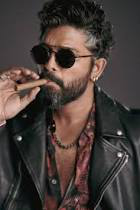

In [158]:
validation_dir = 'C:/Users/Supra/Documents/Supravat/Documents/ISB/Capstone Project/ValidationImage'
valimage = []
for file in os.listdir(validation_dir) :
    valimage.append(os.path.join(validation_dir,file))
    
print(valimage)
    

print(valimage[0])
PIL.Image.open(str(valimage[0]))

[[[49 49 49]
  [49 49 49]
  [49 49 49]
  ...
  [44 42 41]
  [44 42 41]
  [44 42 41]]

 [[49 49 49]
  [50 50 50]
  [50 50 50]
  ...
  [45 43 42]
  [45 43 42]
  [45 43 42]]

 [[50 50 50]
  [50 50 50]
  [50 50 50]
  ...
  [45 43 42]
  [45 43 42]
  [45 43 42]]

 ...

 [[32 30 21]
  [32 30 21]
  [25 24 15]
  ...
  [33 35 29]
  [32 34 28]
  [32 34 28]]

 [[28 27 14]
  [24 23 10]
  [21 20  8]
  ...
  [31 31 25]
  [31 32 26]
  [34 34 28]]

 [[28 28 12]
  [21 21  5]
  [19 18  4]
  ...
  [30 30 24]
  [31 31 25]
  [34 34 28]]]
(1, 180, 180, 3)


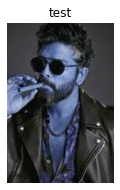

In [160]:
import cv2
image=cv2.imread(str(valimage[0]))
plt.figure(figsize=(10, 10))

ax = plt.subplot(3, 3, i + 1)
plt.imshow(image)
plt.title('test')
plt.axis("off")
image_resized= cv2.resize(image, (img_height,img_width))
print(image_resized)
image=np.expand_dims(image_resized,axis=0)

print(image.shape)

In [161]:
pred=resnet_model.predict(image)
print(pred)

[[9.2394456e-02 2.2544976e-02 9.1730617e-04 2.2207657e-02 1.2002069e-01
  1.8503139e-02 2.7865675e-01 2.0760274e-01 9.4288764e-05 1.0076521e-02
  7.0469268e-04 6.0331688e-04 1.6388163e-01 6.9593382e-03 1.3082917e-02
  4.1720610e-02 2.8358341e-05 6.4671099e-07]]


In [162]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is MaryKom
